In [ ]:
# Load the dataset for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update the path and target column
data_path =  'cleaned_data.csv' #'Life Expectancy Data.csv'
target_col = 'Life expectancy' 

try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{data_path}' not found. Please ensure the dataset is in the working directory.")

# Display basic info
display(data.head(10))
display(data.info())
display(data.describe())





,Unnamed: 0,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
5,5,Afghanistan,2010,Developing,58.8,279.0,74.0,0.01,79.679367,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2
6,6,Afghanistan,2009,Developing,58.6,281.0,77.0,0.01,56.762217,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9
7,7,Afghanistan,2008,Developing,58.1,287.0,80.0,0.03,25.873925,1599.0,15.7,110.0,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
8,8,Afghanistan,2007,Developing,57.5,295.0,82.0,0.02,10.910156,1141.0,15.2,113.0,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
9,9,Afghanistan,2006,Developing,57.3,295.0,84.0,0.03,17.171518,1990.0,14.7,116.0,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2938 non-null   int64  
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Life expectancy                  2938 non-null   float64
 5   Adult Mortality                  2938 non-null   float64
 6   infant deaths                    2938 non-null   float64
 7   Alcohol                          2938 non-null   float64
 8   percentage expenditure           2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

None

,Unnamed: 0,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,1468.500000,2007.518720,69.141872,163.648162,25.329884,4.289881,704.172946,2008.055752,37.839443,35.877672,82.044588,5.464941,81.819605,1.652396,6149.823387,4.736894,4.762898,0.595015,11.323791
std,848.271871,4.613841,9.545250,122.162776,68.078732,4.041024,1759.271578,7434.980257,20.272991,98.948058,24.178622,2.793434,24.453262,4.423303,12326.166286,4.227108,4.295294,0.243627,4.241956
min,0.000000,2000.000000,45.174000,2.370000,0.000000,0.010000,0.000000,0.000000,0.011572,0.000000,4.000000,0.076923,4.000000,0.100000,0.152485,0.011572,0.011572,0.000000,0.055480
25%,734.250000,2004.000000,63.000000,73.000000,0.000000,0.470000,4.685343,0.000000,19.000000,0.000000,77.000000,3.740000,78.000000,0.100000,190.174435,1.500000,1.500000,0.465000,9.500000
50%,1468.500000,2008.000000,72.000000,144.000000,3.000000,3.130000,64.912906,17.000000,43.000000,4.000000,93.000000,5.540000,93.000000,0.100000,1171.983435,3.300000,3.300000,0.662000,12.100000
75%,2202.750000,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,7.100000,7.200000,0.772000,14.100000
max,2937.000000,2015.000000,86.630000,583.040000,495.040000,13.450000,10199.412527,54163.360000,72.063000,767.820000,99.000000,12.707100,99.000000,29.278000,62233.867014,19.500000,19.900000,0.923000,19.000000


### Value of the Project

Accurate life expectancy prediction is valuable for public health officials, policymakers, and researchers. It helps in:
- Identifying key health and socio-economic drivers of life expectancy
- Guiding resource allocation and policy interventions
- Monitoring and improving population health outcomes

By comparing a custom implementation with a standard library, we also gain deeper insight into the mechanics of linear regression and model evaluation.

In [2]:
# Check for missing values
missing = data.isnull().sum()
print("Missing values per column:\n", missing)
# The dataset was cleaned earlier in the wrangle notebook

Missing values per column:
 Unnamed: 0                         0
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


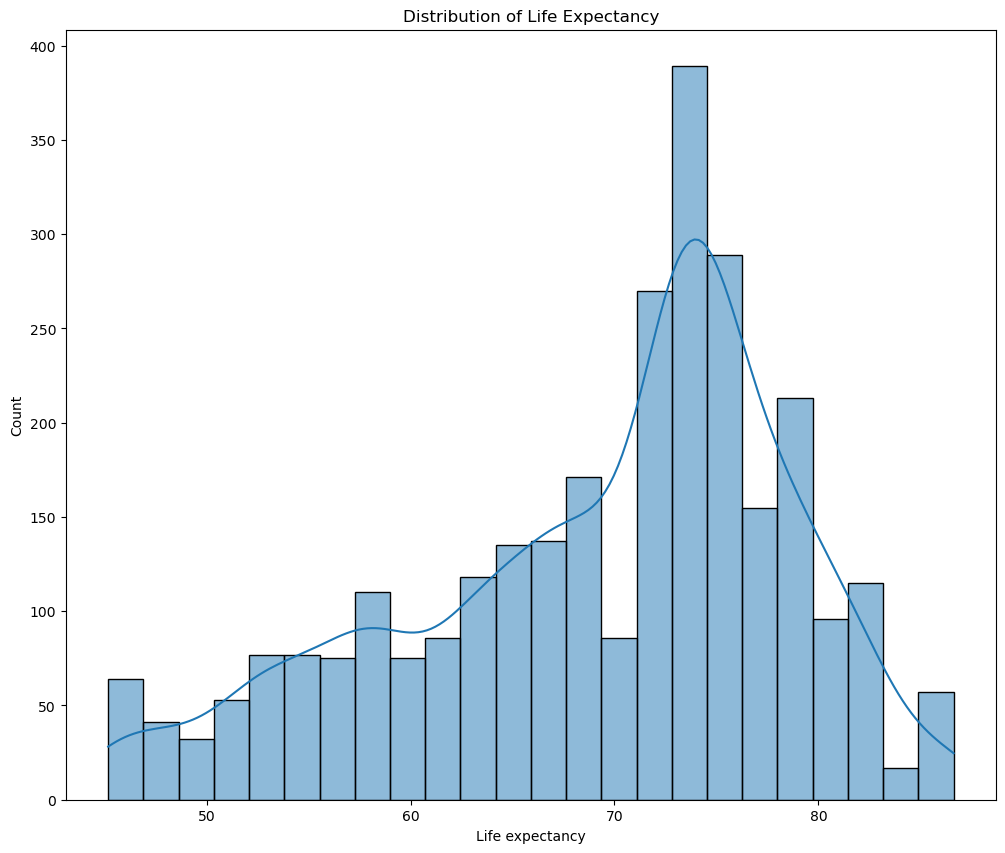

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 10))
sns.histplot(data[target_col], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()


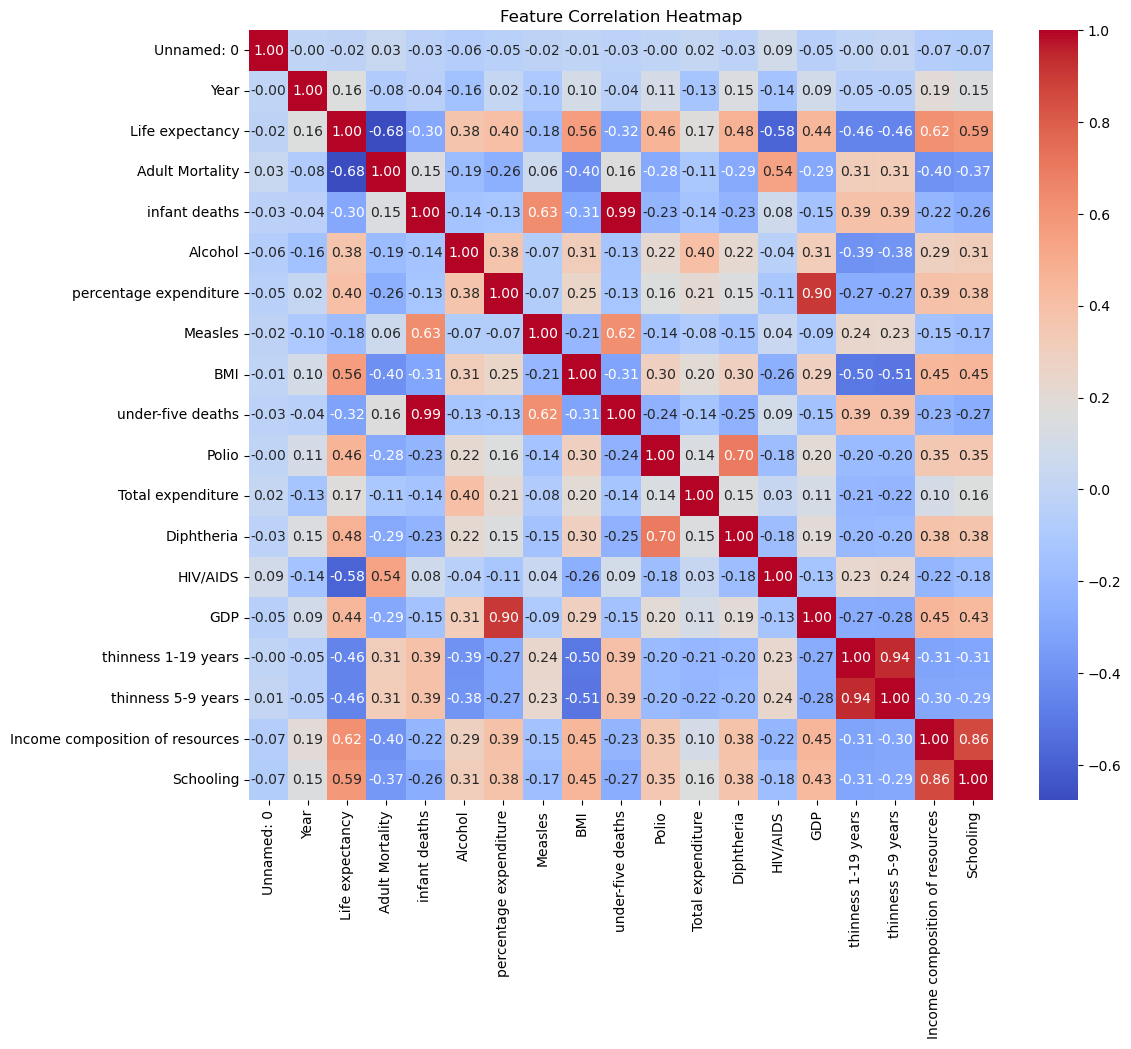

In [4]:
# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

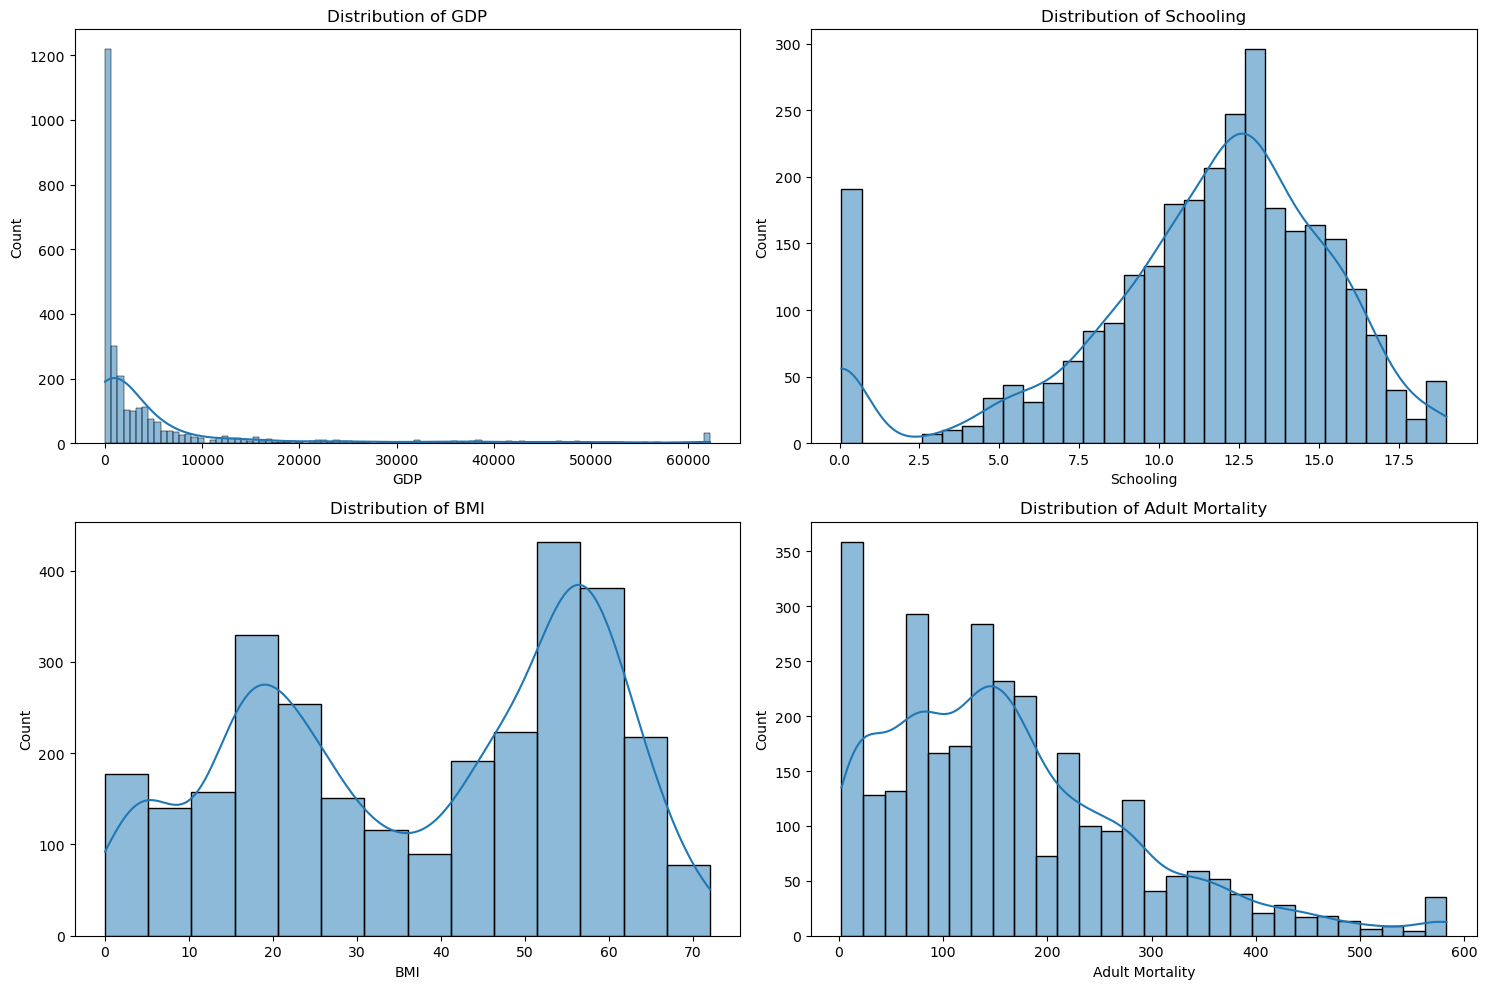

In [13]:
# Select key features to examine
features = ['GDP', 'Schooling', 'BMI', 'Adult Mortality']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Country Status Distribution:
Status
Developing    0.825732
Developed     0.174268
Name: proportion, dtype: float64


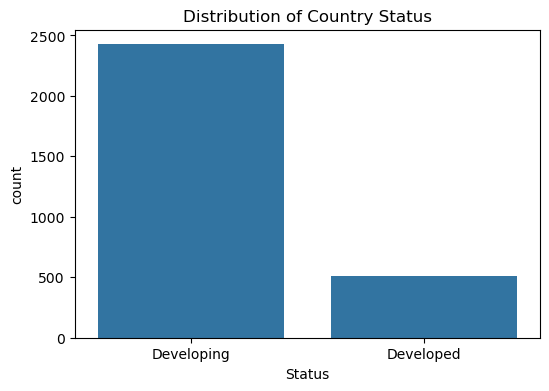

In [16]:
status_counts = data['Status'].value_counts(normalize=True)
print(f"Country Status Distribution:\n{status_counts}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=data)
plt.title('Distribution of Country Status')
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.show()

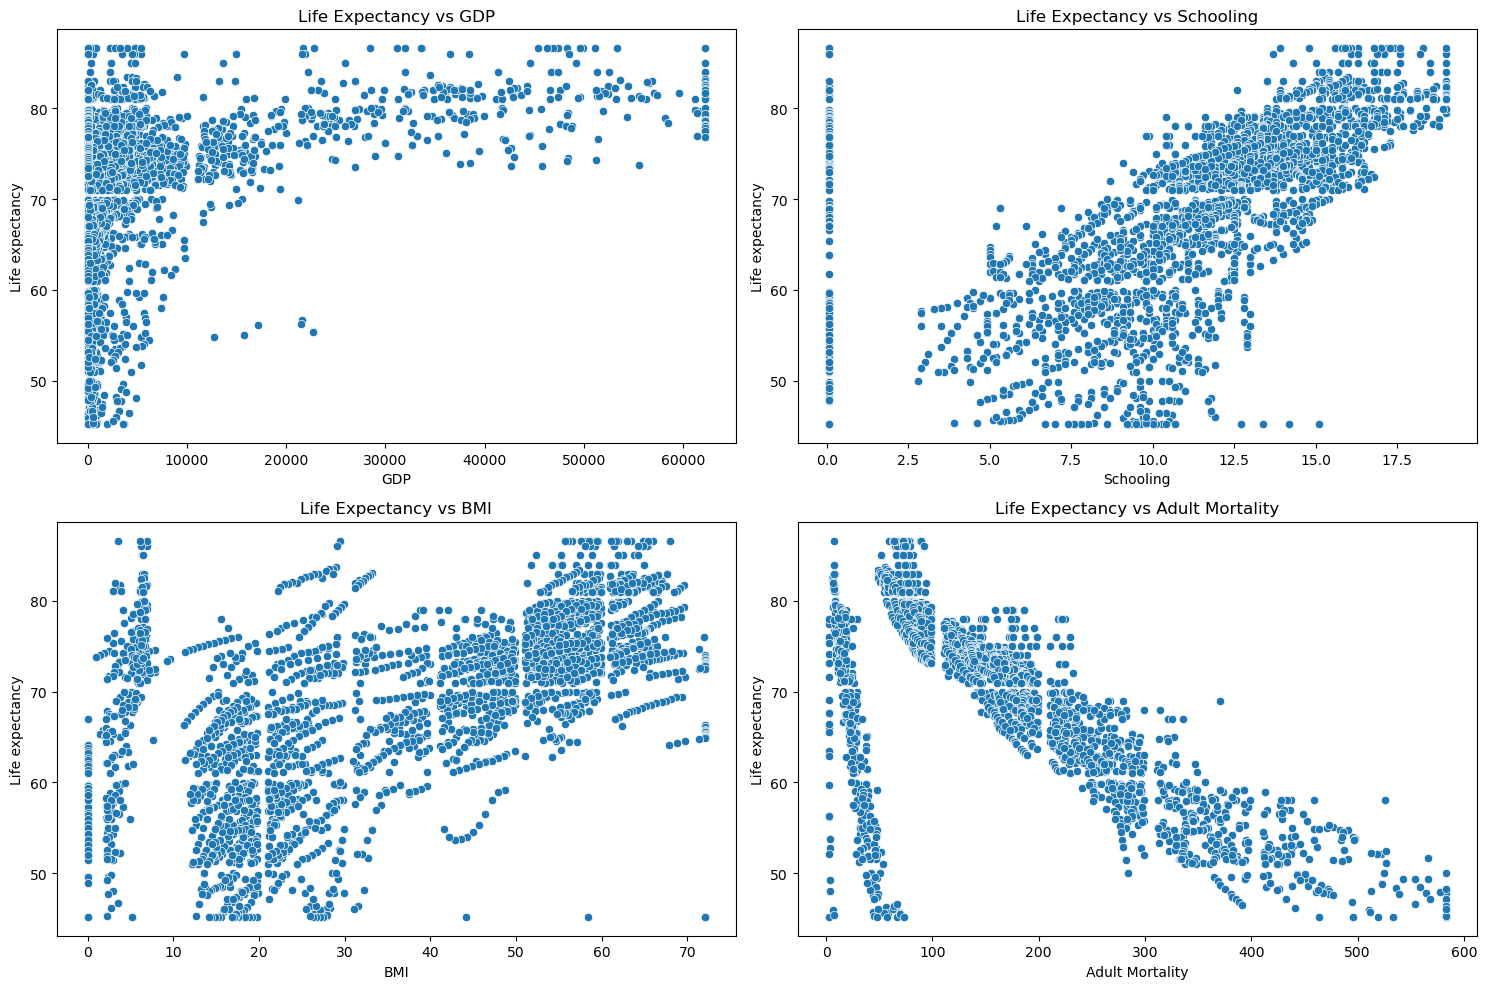

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[col], y=data['Life expectancy'])
    plt.title(f'Life Expectancy vs {col}')
plt.tight_layout()
plt.show()

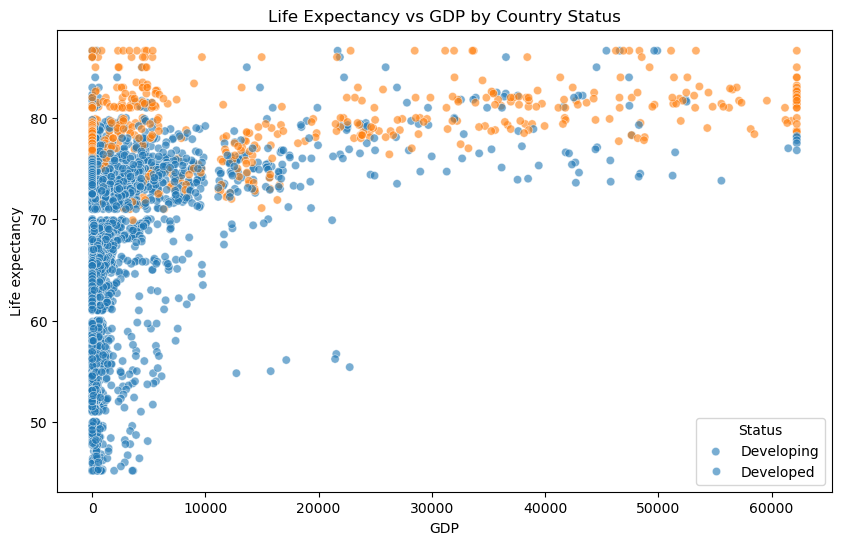

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=data, alpha=0.6)
plt.title('Life Expectancy vs GDP by Country Status')
plt.legend(title='Status', labels=['Developing', 'Developed'])
plt.show()

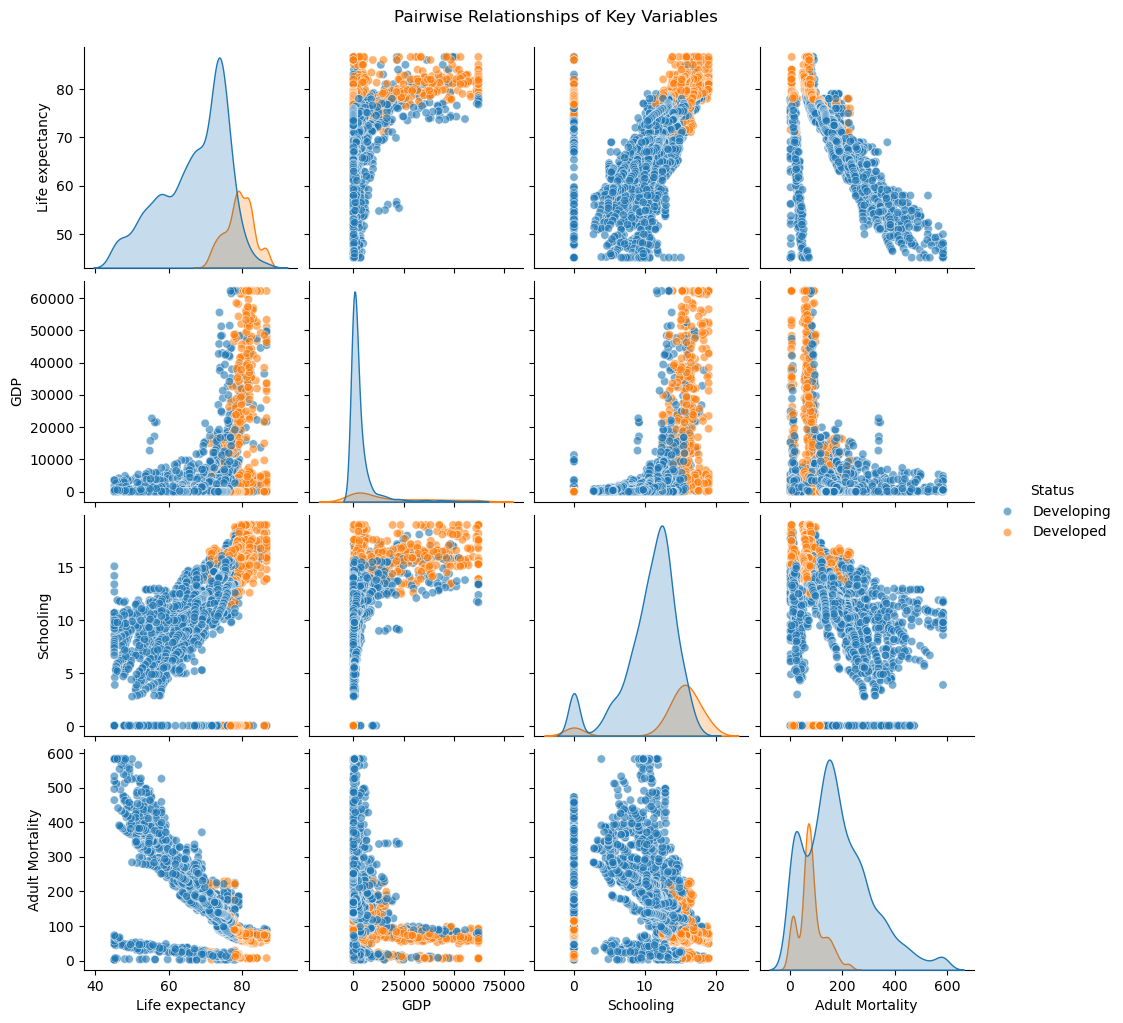

In [29]:
sns.pairplot(data[['Life expectancy', 'GDP', 'Schooling', 'Adult Mortality', 'Status']], 
             hue='Status', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Key Variables', y=1.02)
plt.show()

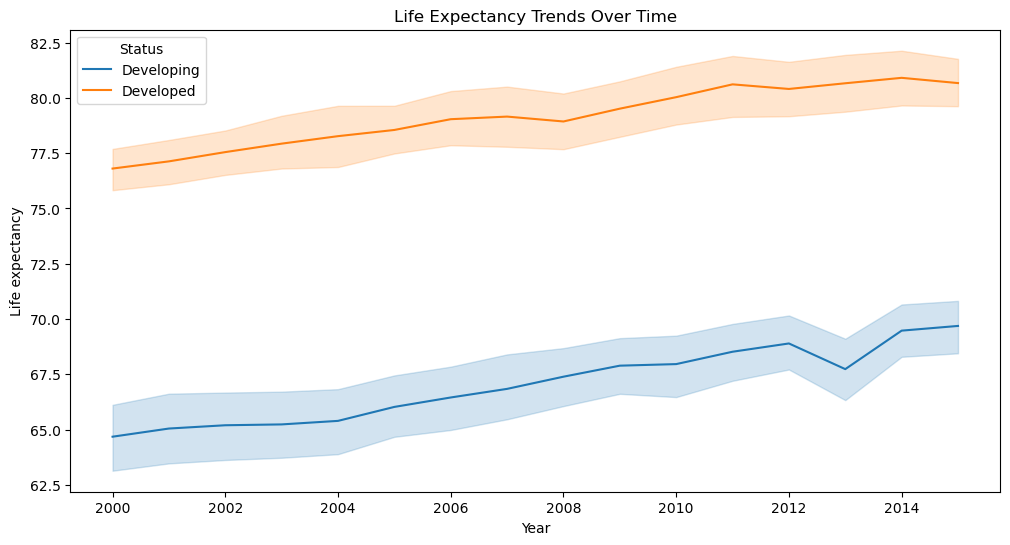

In [39]:
if 'Year' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=data)
    plt.title('Life Expectancy Trends Over Time')
    plt.show()

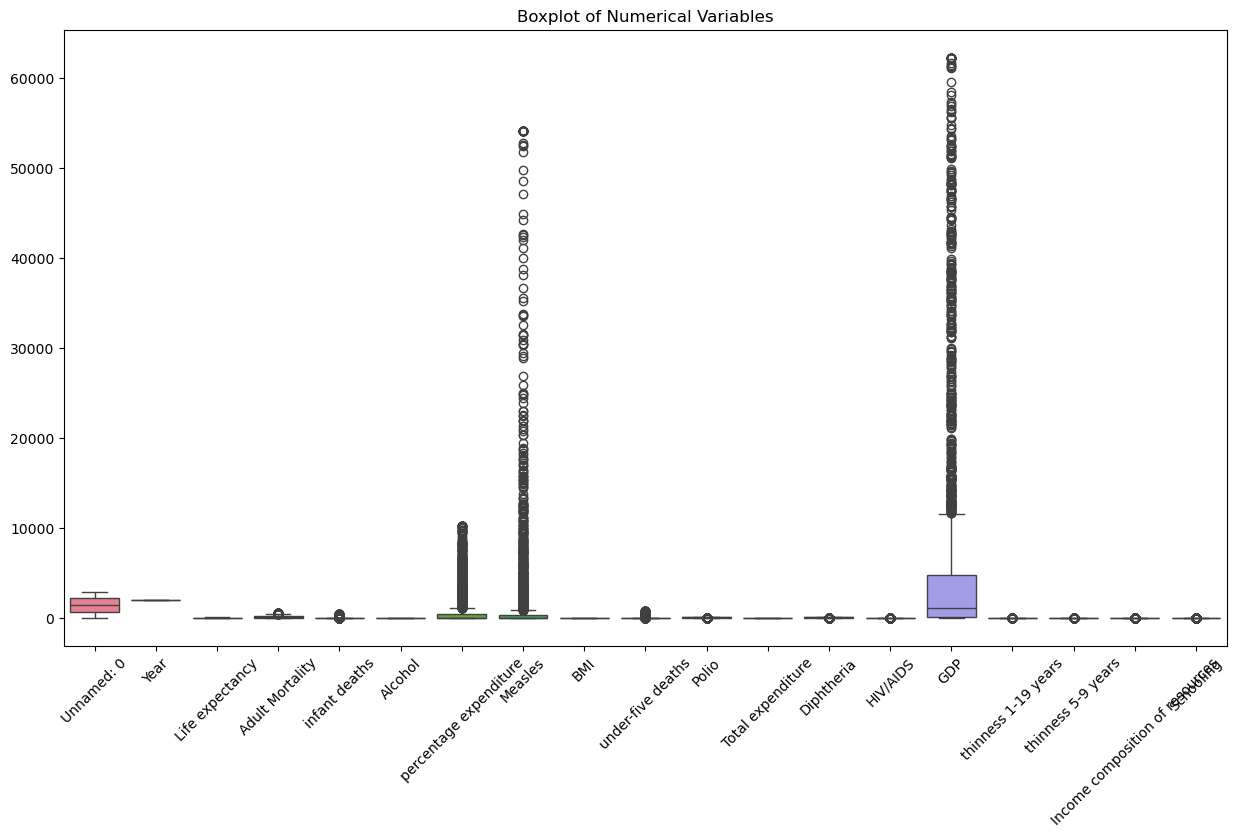

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.show()

In [35]:
# insights for modeling phase
eda_insights = {
    'skewed_features': ['GDP', 'Schooling'],
    'important_predictors': ['Schooling', 'Adult Mortality', 'BMI', 'GDP'],
    'potential_interactions': [('GDP', 'Status')]
}
# Hope this is helpful.

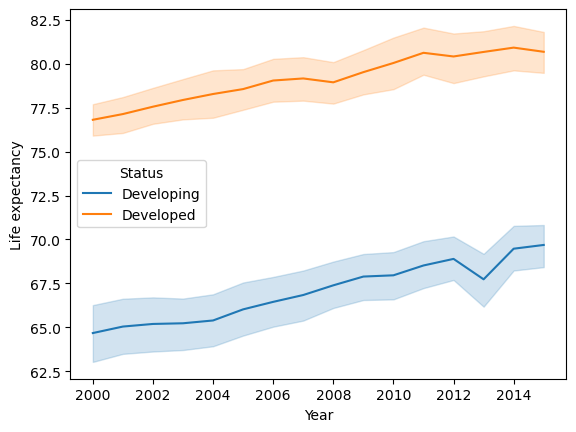

In [ ]:
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=data);